# Format and Test Data
Data Preparation for Data Science Bootcamp HW # 16 D3 Interactive Charting

In [257]:
import pandas as pd
import numpy as np
from os import path

## Read in 2014 Cenus Data
https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?fpt=table

Note: Removed first line from download manually.

In [258]:
df_poverty = pd.read_csv(path.join('CSV', 'ACS_14_1YR_S1701_with_ann.csv'))
df_poverty = df_poverty.loc[:, ['Id2', 'Geography', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
df_poverty.columns = ['id', 'state', 'poverty']
df_poverty.head()

,id,state,poverty
0,1,Alabama,19.3
1,2,Alaska,11.2
2,4,Arizona,18.2
3,5,Arkansas,18.9
4,6,California,16.4


In [259]:
df_age = pd.read_csv(path.join('CSV', 'ACS_14_1YR_B01002.csv'))

df_age = df_age.loc[:, ['Geography', 'Estimate; Median age -- - Total:']]
df_age.columns = ['state', 'age']
df_age.head()

,state,age
0,Alabama,38.6
1,Alaska,33.3
2,Arizona,36.9
3,Arkansas,37.8
4,California,36.0


In [260]:
df_income = pd.read_csv(path.join('CSV', 'ACS_14_1YR_S1901.csv'))
df_income = df_income.loc[:, ['Geography', 'Households; Estimate; Median income (dollars)']]
df_income.columns = ['state', 'income']
df_income.head()

,state,income
0,Alabama,42830
1,Alaska,71583
2,Arizona,50068
3,Arkansas,41262
4,California,61933


### Combine all three facts into one data frame

In [261]:
df_facts = df_poverty.merge(df_age, on='state').merge(df_income, on='state')
df_facts.head()

,id,state,poverty,age,income
0,1,Alabama,19.3,38.6,42830
1,2,Alaska,11.2,33.3,71583
2,4,Arizona,18.2,36.9,50068
3,5,Arkansas,18.9,37.8,41262
4,6,California,16.4,36.0,61933


## Read in BRFSS 2014 Overall Download
https://chronicdata.cdc.gov/Behavioral-Risk-Factors/BRFSS-2014-Overall/5ra3-ixqq

### Q: Do you have any kind of health care

In [262]:
df_healthcare = pd.read_csv(path.join('CSV', 'BRFSS_2014_Overall.csv'))

df_healthcare = df_healthcare.query('Response == "No"')[['Locationabbr', 'Locationdesc', 'Data_value']]
df_healthcare.columns = ['abbr', 'state', 'healthcare']
df_healthcare.head()

,abbr,state,healthcare
1,AL,Alabama,13.9
3,AK,Alaska,15.0
5,AZ,Arizona,14.4
7,AR,Arkansas,16.3
9,CA,California,14.8


### Q: Four level smoking Status

In [263]:
df_smoke = pd.read_csv(path.join('CSV', 'BRFSS_2014_Overall (1).csv'))

In [264]:
df_smoke = df_smoke.query('Response == "Never smoked"')[['Locationdesc', 'Data_value']]
df_smoke.columns = ['state', 'never_smoked']
df_smoke = df_smoke.assign(smoke=100 - df_smoke['never_smoked'])[['state', 'smoke']]
df_smoke.head()

,state,smoke
3,Alabama,45.7
7,Alaska,45.6
11,Arizona,43.0
15,Arkansas,50.0
19,California,35.7


### Q: Weight classification by Body Mass Index (BMI)

In [265]:
df_obese = pd.read_csv(path.join('CSV', 'BRFSS_2014_Overall (2).csv'))[['Locationdesc', 'Response', 'Data_value']]
df_obese.columns = ['state', 'response', 'obese']
df_obese = df_obese[df_obese['response'].str.contains('Obese')]
df_obese = df_obese[['state', 'obese']]
df_obese.head()

,state,obese
0,Alabama,33.5
4,Alaska,29.7
8,Arizona,28.9
12,Arkansas,35.9
16,California,24.7


### Merge all risk into one data frame

In [266]:
df_risks = df_healthcare.merge(df_smoke, on='state').merge(df_obese, on='state')
df_risks.head()

,abbr,state,healthcare,smoke,obese
0,AL,Alabama,13.9,45.7,33.5
1,AK,Alaska,15.0,45.6,29.7
2,AZ,Arizona,14.4,43.0,28.9
3,AR,Arkansas,16.3,50.0,35.9
4,CA,California,14.8,35.7,24.7


## Merge Two Dataframes


In [267]:
df_combo = df_facts.merge(df_risks, on='state')
df_combo.head()

,id,state,poverty,age,income,abbr,healthcare,smoke,obese
0,1,Alabama,19.3,38.6,42830,AL,13.9,45.7,33.5
1,2,Alaska,11.2,33.3,71583,AK,15.0,45.6,29.7
2,4,Arizona,18.2,36.9,50068,AZ,14.4,43.0,28.9
3,5,Arkansas,18.9,37.8,41262,AR,16.3,50.0,35.9
4,6,California,16.4,36.0,61933,CA,14.8,35.7,24.7


## Compute Correlations

In [268]:
np.corrcoef(df_combo['poverty'], df_combo['healthcare'])

array([[1.        , 0.10647163],
       [0.10647163, 1.        ]])

In [269]:
from scipy.stats.stats import pearsonr   
pearsonr(df_combo['poverty'].tolist(), df_combo['healthcare'].tolist())

(0.10647163030882255, 0.45250029525549684)

In [270]:
import matplotlib.pyplot as plt

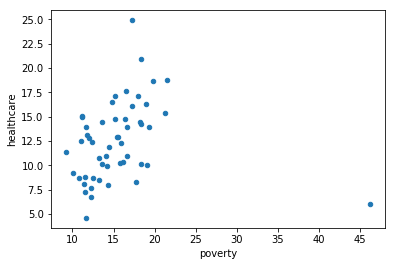

In [271]:
df_combo.plot.scatter(
    x='poverty',
    y='healthcare'
)
plt.show()

There is an outlyer, which is 'Perto Reco'. It has high pverty ratio but lower lack of healthcare. By removing it the correlation increase to over 0.5.

In [272]:
df_combo.assign(ratio=df_combo['poverty']/df_combo['healthcare']).sort_values(by='ratio', ascending=False).head()

,id,state,poverty,age,income,abbr,healthcare,smoke,obese,ratio
51,72,Puerto Rico,46.2,39.3,18928,PR,6.0,29.4,28.3,7.700000
21,25,Massachusetts,11.6,39.4,69160,MA,4.6,41.5,23.3,2.521739
8,11,District of Columbia,17.7,33.8,71648,DC,8.3,35.4,21.7,2.132530
17,21,Kentucky,19.1,38.5,42958,KY,10.0,51.6,31.6,1.910000
45,50,Vermont,12.2,42.8,54166,VT,6.7,47.5,24.8,1.820896


In [273]:
df_combo = df_combo.query('abbr != "PR"')
np.corrcoef(df_combo['poverty'], df_combo['healthcare'])

array([[1.        , 0.52448436],
       [0.52448436, 1.        ]])

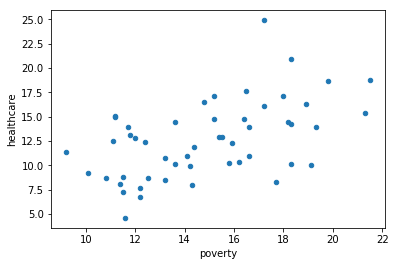

In [274]:
df_combo.plot.scatter(
    x='poverty',
    y='healthcare'
)
plt.show()

### Computer other Correlation coefficient values

In [277]:
for fact in ['poverty', 'age', 'income']:
    for risk in ['healthcare', 'smoke', 'obese']:
        cor = np.corrcoef(df_combo[fact], df_combo[risk])[0,1]
        print(f'{fact} vs. {risk}: {cor}')
        

poverty vs. healthcare: 0.5244843633305496
poverty vs. smoke: 0.2647465933415318
poverty vs. obese: 0.46234624291790566
age vs. healthcare: -0.38521822834939895
age vs. smoke: 0.6316991798005469
age vs. obese: -0.007688827318099485
income vs. healthcare: -0.4340923025616874
income vs. smoke: -0.5320274939024171
income vs. obese: -0.6511345501324289


The about indicate not all risk and fact are strongly correlated, but for each of risk or fact, there is at least one strong correlations.

## Output to CSV

In [278]:
df_combo.to_csv(path.join('Skeleton', 'assets', 'csv', 'state_poverty_vs_healthcare_2014.csv'), index=False)